27.Build both CNN and DNN models for the CIFAR-10 dataset, compare their accuracy and loss

Dataset:- CIFAR 10(Inbuilt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [4]:
num_classes = len(np.unique(y_train))
print("Total number of classes:", num_classes)

Total number of classes: 10


<ipython-input-5-fabfd47057c8>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(y_train[i])


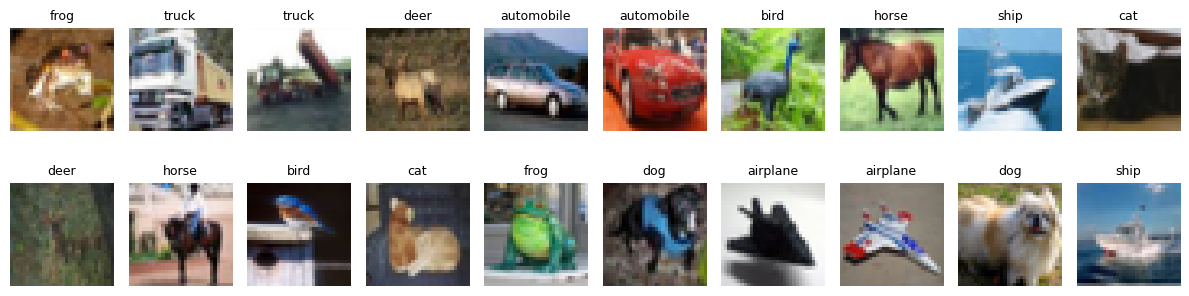

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 3.5))

class_counts = {i: 0 for i in range(10)}
images_per_class = 2
shown = 0

for i in range(len(x_train)):
    label = int(y_train[i])
    if class_counts[label] < images_per_class:
        plt.subplot(2, 10, shown + 1)
        plt.imshow(x_train[i], interpolation='nearest')
        plt.title(class_names[label], fontsize=9)
        plt.axis('off')
        class_counts[label] += 1
        shown += 1
    if all(v >= images_per_class for v in class_counts.values()):
        break

plt.tight_layout()
plt.show()

In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## DNN

In [7]:
model_dnn = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes
])

model_dnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_dnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history_dnn = model_dnn.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2032 - loss: 2.1866 - val_accuracy: 0.3097 - val_loss: 1.9217
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2776 - loss: 1.9541 - val_accuracy: 0.3253 - val_loss: 1.8669
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3038 - loss: 1.8964 - val_accuracy: 0.3530 - val_loss: 1.8188
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3186 - loss: 1.8567 - val_accuracy: 0.3569 - val_loss: 1.7884
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3223 - loss: 1.8446 - val_accuracy: 0.3754 - val_loss: 1.7597
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3336 - loss: 1.8160 - val_accuracy: 0.3565 - val_loss: 1.7962
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3381 - loss: 1.8079 - val_accuracy: 0.3755 - val_loss: 1.7778
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3460 - loss: 1.7952 - val_accuracy: 0.

In [9]:
test_loss, test_acc = model_dnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4114 - loss: 1.6649
Test Accuracy: 0.41


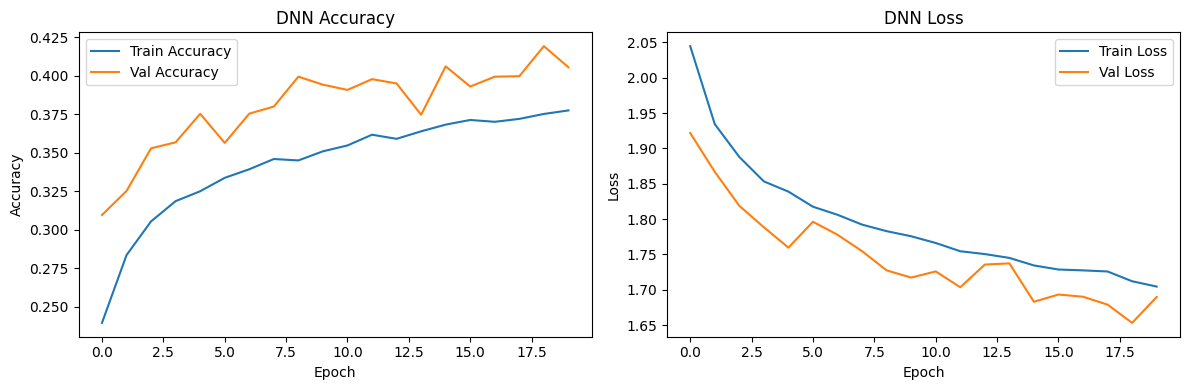

In [10]:
# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_dnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn.history['val_accuracy'], label='Val Accuracy')
plt.title('DNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Val Loss')
plt.title('DNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## CNN

In [11]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2924 - loss: 1.8920 - val_accuracy: 0.5211 - val_loss: 1.3187
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5224 - loss: 1.3236 - val_accuracy: 0.6057 - val_loss: 1.1075
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6065 - loss: 1.1117 - val_accuracy: 0.6634 - val_loss: 0.9556
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6502 - loss: 0.9994 - val_accuracy: 0.6794 - val_loss: 0.9104
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6909 - loss: 0.8872 - val_accuracy: 0.7111 - val_loss: 0.8376
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7226 - loss: 0.8059 - val_accuracy: 0.7163 - val_loss: 0.8285
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7385 - loss: 0.7431 - val_accuracy: 0.7347 - val_loss: 0.7730
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7575 - loss: 0.6921 - val_accuracy: 0.

In [13]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7415 - loss: 1.0026
Test Accuracy: 0.73


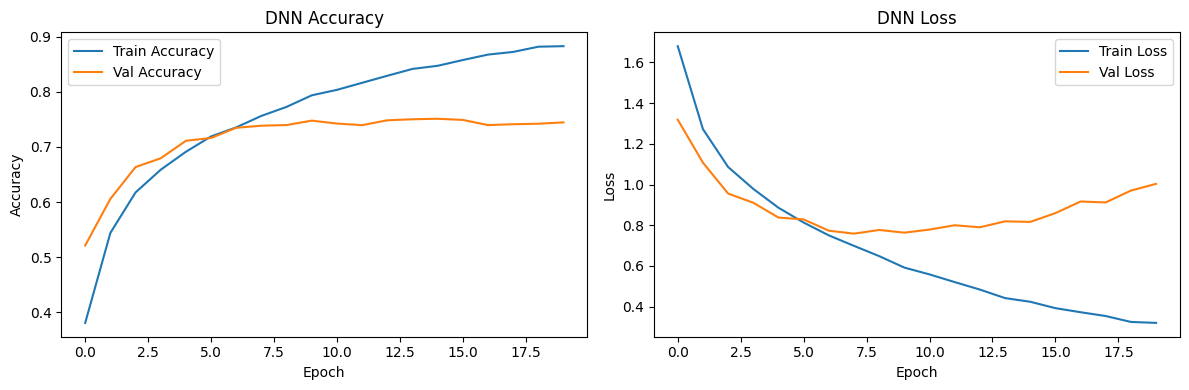

In [14]:
# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('DNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('DNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

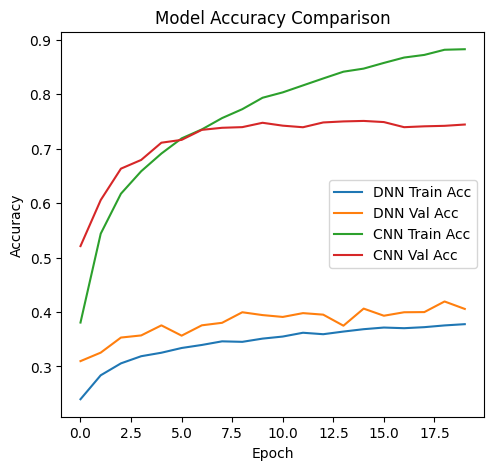

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['accuracy'], label='DNN Train Acc')
plt.plot(history_dnn.history['val_accuracy'], label='DNN Val Acc')
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



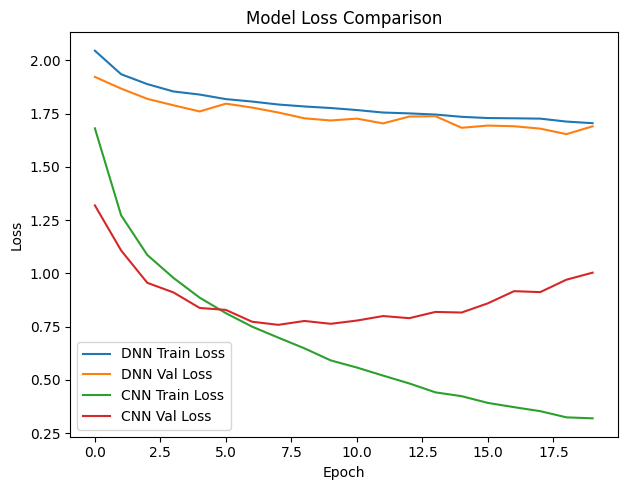

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(history_dnn.history['loss'], label='DNN Train Loss')
plt.plot(history_dnn.history['val_loss'], label='DNN Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


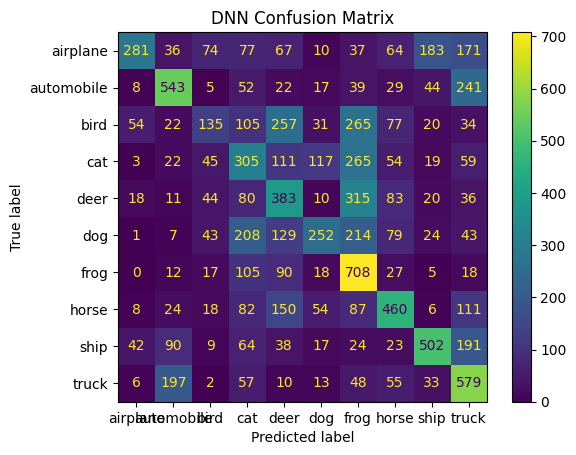

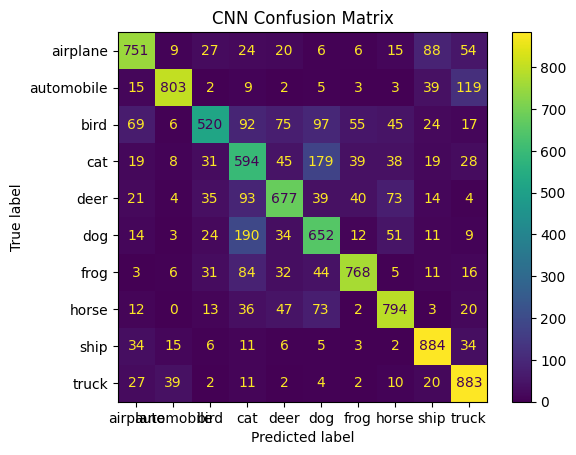

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_dnn = model_dnn.predict(x_test)
y_pred_cnn = model_cnn.predict(x_test)

y_true = np.argmax(y_test, axis=1)
y_pred_dnn = np.argmax(y_pred_dnn, axis=1)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

# Plot DNN Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_dnn, display_labels=class_names)
plt.title("DNN Confusion Matrix")
plt.show()

# Plot CNN Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_cnn, display_labels=class_names)
plt.title("CNN Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import classification_report

print("DNN Classification Report:")
print(classification_report(y_true, y_pred_dnn, target_names=class_names))

print("CNN Classification Report:")
print(classification_report(y_true, y_pred_cnn, target_names=class_names))

DNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.67      0.28      0.40      1000
  automobile       0.56      0.54      0.55      1000
        bird       0.34      0.14      0.19      1000
         cat       0.27      0.30      0.29      1000
        deer       0.30      0.38      0.34      1000
         dog       0.47      0.25      0.33      1000
        frog       0.35      0.71      0.47      1000
       horse       0.48      0.46      0.47      1000
        ship       0.59      0.50      0.54      1000
       truck       0.39      0.58      0.47      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.40     10000
weighted avg       0.44      0.41      0.40     10000

CNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.75      0.76      1000
  automobile       0.90      0.80      0.85      1000
        bird       0.75 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


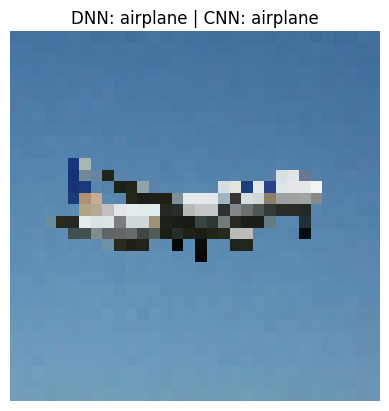

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img('/content/aeroplane.jpg', target_size=(32, 32))  # Resize to 32x32
img_array = img_to_array(img) / 255.0                      # Normalize
img_array = np.expand_dims(img_array, axis=0)              # Add batch dimension

# Predict with DNN
pred_dnn = model_dnn.predict(img_array)
class_dnn = class_names[np.argmax(pred_dnn)]

# Predict with CNN
pred_cnn = model_cnn.predict(img_array)
class_cnn = class_names[np.argmax(pred_cnn)]

plt.imshow(img)
plt.title(f"DNN: {class_dnn} | CNN: {class_cnn}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


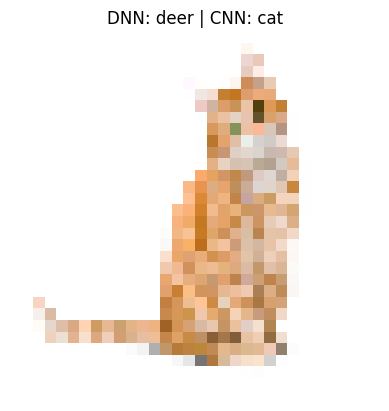

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img = load_img('/content/cat.jpg', target_size=(32, 32))  # Resize to 32x32
img_array = img_to_array(img) / 255.0                      # Normalize
img_array = np.expand_dims(img_array, axis=0)              # Add batch dimension

# Predict with DNN
pred_dnn = model_dnn.predict(img_array)
class_dnn = class_names[np.argmax(pred_dnn)]

# Predict with CNN
pred_cnn = model_cnn.predict(img_array)
class_cnn = class_names[np.argmax(pred_cnn)]

plt.imshow(img)
plt.title(f"DNN: {class_dnn} | CNN: {class_cnn}")
plt.axis('off')
plt.show()

 ## CNN (Convolutional Neural Network)
A Convolutional Neural Network (CNN) is a specialized type of deep neural network primarily used for image and video recognition. It uses convolutional layers that apply filters to extract spatial features like edges, textures, and shapes from input data, preserving the spatial structure of the input.

## DNN (Deep Neural Network)
A Deep Neural Network (DNN) is an artificial neural network with multiple layers between the input and output layers. These layers are typically fully connected (dense layers), and they allow the model to learn complex patterns in data through hierarchical feature representations.

## What is Model Accuracy?
Accuracy is a metric that shows how many predictions your model got right out of all predictions.

Formula:
Accuracy=(Number of Correct Predictions/Total Number of Predictions)×100%

Example:
If your model correctly predicts 90 images out of 100, the accuracy is 90%.

## What is Model Loss?
Loss is a numeric value that represents how wrong the model's predictions are. It is calculated using a loss function like:

CrossEntropyLoss (for classification)
Mean Squared Error (MSE) (for regression)

Key Point:
Lower loss = better model

Loss is used by the model to update weights during training (via backpropagation)